# Modelos Preditivos

Para avaliar qual seria o modelo implementado, algumas opções foram testadas:

#### 1 - Regressão Logística

Existem dois tipos de mensuráveis, as variáveis (item sendo medido) e a variável alvo, que é o resultado.

Por exemplo, ao tentar prever se um aluno será aprovado ou reprovado em um teste, as horas estudadas são o recurso, e a variável de resposta terá dois valores - aprovado ou reprovado.

#### 2 - Árvore de Decisão

Tais algoritmos subdividem progressivamente os dados em conjuntos cada vez menores e mais específicos, em termos de seus atributos, até atingirem um tamanho simplificado o bastante para ser rotulado. Para isso é necessário treinar o modelo com dados previamente rotulados, de modo a aplicá-lo a dados novos.

Em geral, uma árvore de decisão é composta por perguntas e respostas booleanas, classificando um indivíduo ou entidade de acordo com o conjunto de respostas obtidas pelo conjunto de perguntas formuladas. 

#### 3 - Floresta Aleatória

O Random Forest é um outro algoritmo de aprendizagem supervisionada, ele cria uma combinação (ensemble) de árvores de decisão usando a técnica de bagging que tem como objetivo reduzir a variância das previsões.

No Random Forest teremos diferentes árvores construídas a partir do mesmo conjunto de dados mas de forma aleatória, o modelo irá consultar cada uma dessas árvores e no final fazer uma votação baseado na classe majoritária quando estamos falando de classificação.


##### Nesta etapa, foi construido estes modelos de classificação com o auxílio da biblioteca Scikit-learn. Embora existam muitos outros modelos que poderiam ser utilizados, esses são os modelos mais populares usados para resolver problemas de classificação. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
%matplotlib inline
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [3]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Ao analisar as estatísticas, é visto que os valores na métrica *Amout* estão variando bastante quando comparados com o resto das variáveis. Para reduzir sua gama de valores, podemos normalizá-la usando o método ‘StandardScaler’.

In [4]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## Seleção de Métricas

Pronto. Agora são definidas as métricas e a variável objetivo.

In [5]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
Index([], dtype='object')


In [6]:
data_features = df[feature_names]
data_target = df[target]

## Data Split

Nesse passo, o dataframe é separado em dois: um para treino e outro para teste.

In [7]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Modelos 

In [8]:
# 1. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 2. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 3. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

## Avaliação

In [9]:
# 1. Accuracy score

print(cl('Acurácia', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Valor de acurácia do modelo de Regressão Logística: {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Valor de acurácia do modelo de Árvore de Decisão: {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold'], color='green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Valor de acurácia do modelo de Floresta Aleatória: {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

Acurácia
------------------------------------------------------------------------
Valor de acurácia do modelo de Regressão Logística: 0.9991924440855307
------------------------------------------------------------------------
Valor de acurácia do modelo de Árvore de Decisão: 0.9993679997191109
------------------------------------------------------------------------
Valor de acurácia do modelo de Floresta Aleatória: 0.9993153330290369
------------------------------------------------------------------------


In [10]:
# 2. F1 score

print(cl('F1', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 do modelo de Regressão Logística: {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 do modelo de Árvore de Decisão: {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold'], color='green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 do modelo de Floresta Aleatória: {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1
------------------------------------------------------------------------
F1 do modelo de Regressão Logística: 0.7356321839080459
------------------------------------------------------------------------
F1 do modelo de Árvore de Decisão: 0.8105263157894738
------------------------------------------------------------------------
F1 do modelo de Floresta Aleatória: 0.7796610169491525
------------------------------------------------------------------------


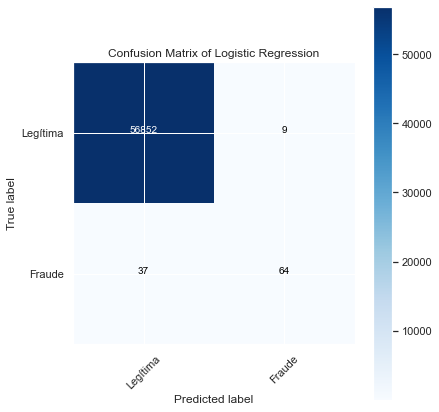

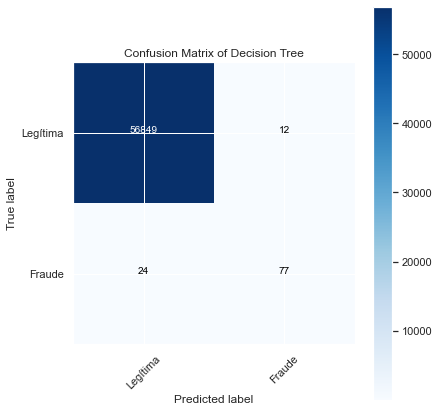

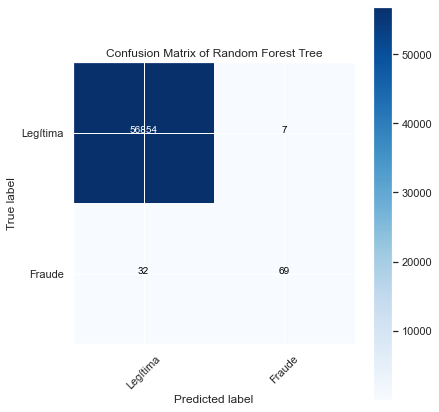

In [11]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)


# 1. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Legítima','Fraude'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 2. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Legítima','Fraude'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 3. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Legítima','Fraude'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()
